In [ ]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# Numpy:

NumPy, qui est l’abréviation de Numerical Python, est l’un des plus importants packages fondamentaux pour le calcul numérique en Python. La plupart des programmes de calcul offrant des fonctionnalités scientifiques utilisent les tableaux de NumPy comme lingua franca pour l’échange de données.

Voici quelques-uns des éléments que vous trouverez dans NumPy :
- ndarray, un tableau multidimensionnel efficace, fournissant des opérations arithmétiques rapides orientées tableaux ainsi que des capacités de diffusion souples.
- Fonctions mathématiques pour des opérations rapides sur des tableaux de données entiers sans avoir à écrire des boucles.
- Outils de lecture/écriture de données de tableaux sur disque, et outils de travail avec des fichiers mappés en mémoire.
- Algèbre linéaire, génération de nombres aléatoires et capacités de transformation de Fourier.
- API C pour connecter NumPy avec des librairies écrites en C, C++ ou Fortran.

NumPy est si important pour les calculs numériques en Python car il est conçu pour être efficace sur de grands jeux de données. Il y a plusieurs raisons à cela :
- NumPy stocke en interne les données dans un bloc de mémoire contigu, indépendant des autres objets Python natifs. La librairie d’algorithmes de NumPy écrite en langage C peut fonctionner sur cette mémoire sans aucune vérification de type ou autre surcharge. Les tableaux NumPy utilisent également beaucoup moins de mémoire que les séquences natives de Python.
- Les opérations NumPy effectuent des calculs complexes sur des tableaux entiers sans avoir besoin des boucles for de Python. Pour vous donner une idée de la différence de performance, considérez un tableau NumPy d’un million d’entiers, et la liste Python équivalente


In [ ]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

Multiplions maintenant chaque séquence par 2 :

In [ ]:
%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]

4.42 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
166 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Les algorithmes basés sur NumPy sont généralement 10 à 100 fois plus rapides (ou plus) que leurs homologues en Python pur et utilisent beaucoup moins de mémoire.

## NumPy et ndarray : un objet multidimensionnel

L’une des caractéristiques clés de NumPy est son objet tableau à N dimensions, ou ndarray, qui est un conteneur rapide et polyvalent pour les grands jeux de données en Python. Les tableaux vous permettent d’effectuer des opérations mathématiques sur des blocs entiers de données en utilisant une syntaxe similaire à celle des opérations équivalentes entre éléments scalaires. Pour vous donner une idée de la façon dont NumPy permet des calculs par lots avec une syntaxe similaire aux valeurs scalaires des objets standard de Python, j’importe d’abord NumPy et je génère un petit tableau de données aléatoires :

In [ ]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[ 0.4967, -0.1383,  0.6477],
       [ 1.523 , -0.2342, -0.2341]])

J’applique ensuite des opérations mathématiques sur ces données :

In [ ]:
data * 10

array([[ 4.9671, -1.3826,  6.4769],
       [15.2303, -2.3415, -2.3414]])

In [ ]:
data + data

array([[ 0.9934, -0.2765,  1.2954],
       [ 3.0461, -0.4683, -0.4683]])

Dans le premier exemple, tous les éléments ont été multipliés par 10. Dans le second, les valeurs correspondantes de chaque « cellule » du tableau ont été ajoutées les unes aux autres.

Un ndarray est un conteneur multidimensionnel générique pour des données homogènes, c’est-à-dire que tous les éléments doivent être du même type. Chaque tableau a une forme (shape), un tuple indiquant la taille de chaque dimension, et un dtype, un objet décrivant le type de données du tableau :

In [ ]:
data.shape

(2, 3)

In [ ]:
data.dtype

dtype('float64')

## Créer des ndarray
La façon la plus simple de créer un tableau est d’utiliser la fonction array. Celle-ci accepte tout objet de type séquence (y compris les autres tableaux) et produit un nouveau tableau NumPy contenant les données qui lui sont passées. Par exemple, une liste est un bon candidat pour une telle conversion :

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Les séquences imbriquées, comme une liste de listes de même longueur, seront converties en un tableau multidimensionnel :

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Comme data2 était une liste de listes, le tableau NumPy arr2 a deux dimensions dont la forme est déduite des données. Nous pouvons le confirmer en examinant les attributs ndim et shape :

In [ ]:
arr2.ndim

2

In [ ]:
arr2.shape

(2, 4)

Sauf indication contraire, np.array essaie de déduire un bon type de données pour le tableau qu’il crée. Le type de données est stocké dans un objet de métadonnées spécial, dtype. Ainsi, dans les deux exemples précédents, nous avons :

In [ ]:
arr1.dtype

dtype('float64')

In [ ]:
arr2.dtype

dtype('int64')

En plus de np.array, il existe un certain nombre d’autres fonctions permettant de créer de nouveaux tableaux. Par exemple, zeros et ones créent des tableaux de 0 ou de 1, respectivement, avec une longueur ou une forme donnée. empty crée un tableau sans initialiser ses valeurs à une valeur particulière. Pour créer un tableau de dimensions supérieures avec ces méthodes, il faut passer un tuple pour spécifier la forme :

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

*Remarque*:  
Il n’est pas sûr de supposer que np.empty retournera un tableau rempli de zéros. Dans certains cas, il peut renvoyer des valeurs non initialisées, des genres de « déchets ».

arange est une version ndarray de la fonction native range de Python :

In [ ]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Types de données pour les ndarray
Le type de données, ou dtype, est un objet spécial contenant les informations (ou métadonnées, c’est-à-dire des données sur les données) dont le ndarray a besoin pour interpréter un élément de mémoire comme étant d’un type de données particulier :

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype

dtype('float64')

In [ ]:
arr2.dtype

dtype('int32')

Vous pouvez explicitement convertir ou diffuser un tableau d’un dtype vers un autre en utilisant la méthode astype des ndarray :

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

Dans cet exemple, les nombres entiers ont été diffusés en virgule flottante. Si je diffuse des nombres en virgule flottante pour qu’ils deviennent de type entier, la partie décimale sera tronquée :

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [ ]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

Si vous disposez d’un tableau de chaînes de caractères représentant des nombres, vous pouvez utiliser astype pour les convertir en un format numérique :

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

## Arithmétique avec des tableaux NumPy
Les tableaux sont importants car ils vous permettent d’exprimer des opérations par lots sur des données sans avoir à écrire de boucles de répétition for. Les utilisateurs de NumPy appellent cela la vectorisation. Toute opération arithmétique entre des tableaux de taille égale applique cette opération élément par élément :

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [ ]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Les opérations arithmétiques avec des scalaires propagent l’argument scalaire à chaque élément du tableau :

In [ ]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [ ]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

Les comparaisons entre des tableaux de même taille donnent des tableaux booléens :

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [ ]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Indexation et tranchage élémentaires
L’indexation des tableaux NumPy est un sujet riche, car il existe de nombreuses façons de sélectionner un sous-ensemble de vos données ou des éléments individuels selon vos besoins. Le cas des tableaux à une dimension est simple. En surface, ils agissent de manière similaire aux listes Python :

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr[5]

5

In [ ]:
arr[5:8]

array([5, 6, 7])

In [ ]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Comme vous pouvez le voir, si vous attribuez une valeur scalaire à une tranche, comme dans arr [5 : 8] = 12, cette valeur est propagée (donc diffusée) à la sélection tout entière. Une première distinction importante par rapport aux listes natives de Python est que les tranches de tableaux sont des vues sur le tableau original. Cela signifie que les données ne sont pas copiées, et que toute modification apportée à la vue sera répercutée dans le tableau source. Pour donner un exemple, je crée d’abord une tranche (slice) du tableau arr :

In [ ]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Maintenant, lorsque je change des valeurs dans arr_slice, ces transformations sont reflétées dans le tableau original arr :

In [ ]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

La tranche « vide » [ : ] affectera toutes les valeurs d’un tableau :

In [ ]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Si vous n’êtes pas encore familiarisé avec NumPy, vous pourriez être surpris par ce comportement, surtout si vous travaillez avec d’autres langages de programmation de tableaux qui copient directement les données. Comme NumPy a été conçu pour pouvoir fonctionner avec de très grands tableaux, il n’est pas difficile d’imaginer les problèmes de performances et de mémoire qui pourraient se poser si NumPy insistait pour toujours copier des données.  
Si vous voulez une copie d’une tranche d’un tableau au lieu d’une vue, vous devrez le spécifier explicitement, par exemple via l’instruction arr[5:8].copy().  


Avec des tableaux possédant davantage de dimensions, vous avez beaucoup plus d’options. Dans un tableau bidimensionnel, les éléments pour chaque indice ne sont plus des scalaires, mais plutôt des tableaux unidimensionnels :  

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Il est ainsi possible d’accéder aux éléments individuels de manière récursive. Mais cela demande un peu trop de travail. C’est pourquoi vous pouvez passer une liste d’indices séparés par des virgules pour sélectionner des éléments individuels. Ces instructions sont donc équivalentes :

In [ ]:
arr2d[0][2]

3

In [ ]:
arr2d[0, 2]

3

Cette Figure illustre le mode d’indexation sur un tableau bidimensionnel. Je trouve utile de considérer l’axe 0 comme représentant les « lignes » du tableau, et l’axe 1 comme représentant ses « colonnes ».
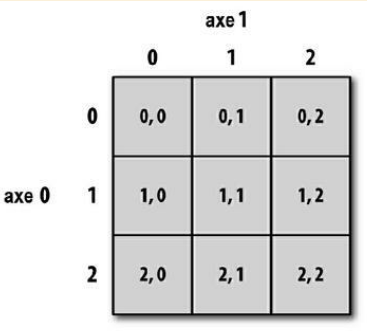

Dans les tableaux multidimensionnels, si vous omettez les indices du haut, l’objet renvoyé sera un ndarray de dimension inférieure comprenant toutes les données des dimensions supérieures. Ainsi, dans le tableau 2 × 2 × 3 arr3d :

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] est un tableau de dimensions 2 × 3 :

In [ ]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Des valeurs scalaires comme des tableaux peuvent être affectées à arr3d[0] :

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

De même, arr3d[1, 0] vous fournit toutes les valeurs dont les indices commencent par (1, 0), produisant ainsi un tableau à une dimension :


In [ ]:
arr3d[1, 0]

array([7, 8, 9])

Cette expression est la même que si nous avions indexé en deux étapes :

In [ ]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
x[0]

array([7, 8, 9])

Notez que, dans tous ces cas où des sous-sections du tableau ont été sélectionnées, les tableaux renvoyés sont des vues.

### Indexer avec des tranches:
Comme les objets unidimensionnels tels que les listes Python, les tableaux ndarray peuvent être partagés en tranches avec la syntaxe familière :

In [ ]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [ ]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Considérons le tableau bidimensionnel défini plus haut, arr2d. Trancher ce tableau est un peu différent :

In [ ]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Comme vous pouvez le constater, le tranchage a été effectué selon l’axe 0, le premier. Une tranche, par conséquent, sélectionne une série d’éléments le long d’un axe. Il peut être utile de lire l’expression arr2d[ : 2] comme signifiant « sélectionner les deux premières lignes de arr2d ».  

Vous pouvez passer plusieurs tranches, tout comme vous pouvez passer plusieurs indices :

In [ ]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

En procédant ainsi, vous obtenez toujours des vues de tableaux ayant le même nombre de dimensions. En mélangeant des indices entiers et des tranches, vous obtenez des tranches de dimensions inférieures.  
Par exemple, je peux sélectionner la deuxième ligne, mais seulement les deux premières colonnes, comme ceci :

In [ ]:
arr2d[1, :2]

array([4, 5])

De même, je peux sélectionner la troisième colonne, mais seulement les deux premières lignes, de cette manière :

In [ ]:
arr2d[:2, 2]

array([3, 6])

La Figure suivante illustre cette méthode de travail. Notez que le deux-points signifie que l’on prend l’axe entier, de sorte que vous pouvez trancher uniquement les axes de dimensions supérieures avec la syntaxe suivante :

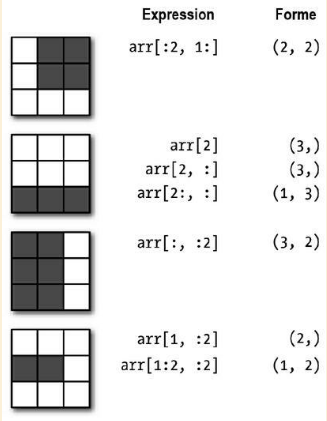

In [ ]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Bien sûr, l’affectation à une tranche s’applique à la sélection tout entière :

In [ ]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Indexation booléenne
Prenons un exemple dans lequel nous avons quelques données dans un tableau, ainsi qu’un tableau de noms avec des doublons. Je vais utiliser ici la fonction randn de numpy.random pour générer des données aléatoires avec une distribution normale :

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
data

array([[ 1.5792,  0.7674, -0.4695,  0.5426],
       [-0.4634, -0.4657,  0.242 , -1.9133],
       [-1.7249, -0.5623, -1.0128,  0.3142],
       [-0.908 , -1.4123,  1.4656, -0.2258],
       [ 0.0675, -1.4247, -0.5444,  0.1109],
       [-1.151 ,  0.3757, -0.6006, -0.2917],
       [-0.6017,  1.8523, -0.0135, -1.0577]])

Supposons que chaque nom soit associé à une ligne du tableau de données et que nous voulions sélectionner toutes les lignes correspondant au nom 'Bob'. Comme dans le cas des opérations arithmétiques, les comparaisons (telles que ==) avec les tableaux sont également vectorisées. Ainsi, la comparaison de noms avec la chaîne 'Bob' renvoie un tableau booléen :

In [ ]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

Ce tableau booléen peut être passé lors de l’indexation du tableau data :

In [ ]:
data[names == 'Bob']

array([[ 1.5792,  0.7674, -0.4695,  0.5426],
       [-0.908 , -1.4123,  1.4656, -0.2258]])

Le tableau booléen doit être de la même longueur que l’axe du tableau qu’il indexe. Vous pouvez même mélanger et faire correspondre des tableaux booléens avec des tranches ou des entiers (ou des séquences d’entiers, sujet sur lequel nous reviendrons plus tard). Dans ces exemples, j’effectue une sélection des lignes avec names == 'Bob' et j’indexe également les colonnes :

In [ ]:
data[names == 'Bob', 2:]

array([[-0.4695,  0.5426],
       [ 1.4656, -0.2258]])

In [ ]:
data[names == 'Bob', 3]

array([ 0.5426, -0.2258])

Pour tout sélectionner sauf 'Bob', vous pouvez utiliser soit ! =, soit la condition de négation avec ∼:

In [ ]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [ ]:
data[~(names == 'Bob')] #data[(names != 'Bob')]

array([[-0.4634, -0.4657,  0.242 , -1.9133],
       [-1.7249, -0.5623, -1.0128,  0.3142],
       [ 0.0675, -1.4247, -0.5444,  0.1109],
       [-1.151 ,  0.3757, -0.6006, -0.2917],
       [-0.6017,  1.8523, -0.0135, -1.0577]])

L’opérateur ∼ peut être utile lorsque vous souhaitez inverser une condition générale :

In [ ]:
cond = names == 'Bob'
data[~cond]

array([[-0.4634, -0.4657,  0.242 , -1.9133],
       [-1.7249, -0.5623, -1.0128,  0.3142],
       [ 0.0675, -1.4247, -0.5444,  0.1109],
       [-1.151 ,  0.3757, -0.6006, -0.2917],
       [-0.6017,  1.8523, -0.0135, -1.0577]])

En sélectionnant deux des trois noms pour combiner plusieurs conditions booléennes, on peut utiliser les opérateurs arithmétiques booléens comme & (et) et | (ou) :

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
data[mask]

array([[ 1.5792,  0.7674, -0.4695,  0.5426],
       [-1.7249, -0.5623, -1.0128,  0.3142],
       [-0.908 , -1.4123,  1.4656, -0.2258],
       [ 0.0675, -1.4247, -0.5444,  0.1109]])

La sélection de données dans un tableau par indexation booléenne crée toujours une copie de ces données, même si le tableau renvoyé est inchangé.  
*Note:* Les mots clés Python and et or ne fonctionnent pas avec les tableaux booléens. Utilisez à leur place & (et) et | (ou).

La définition de valeurs à l’aide de tableaux booléens fonctionne comme on peut s’attendre. Exemple:

In [ ]:
data[data < 0] = 0
data

array([[1.5792, 0.7674, 0.    , 0.5426],
       [0.    , 0.    , 0.242 , 0.    ],
       [0.    , 0.    , 0.    , 0.3142],
       [0.    , 0.    , 1.4656, 0.    ],
       [0.0675, 0.    , 0.    , 0.1109],
       [0.    , 0.3757, 0.    , 0.    ],
       [0.    , 1.8523, 0.    , 0.    ]])

Il est également facile de définir des lignes ou des colonnes entières à l’aide d’un tableau booléen unidimensionnel :

In [ ]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.242 , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.3757, 0.    , 0.    ],
       [0.    , 1.8523, 0.    , 0.    ]])

Transposer des tableaux et permuter les axes La transposition est une forme spéciale de remodelage qui renvoie une vue sur les données sous-jacentes sans rien copier. Les tableaux disposent de la méthode transpose ainsi que de l’attribut spécial T :

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Cette méthode est très courante pour les calculs matriciels, par exemple lorsque vous calculez le produit scalaire de la matrice avec np.dot :

In [ ]:
arr = np.random.randn(6, 3)
arr

array([[ 0.8225, -1.2208,  0.2089],
       [-1.9597, -1.3282,  0.1969],
       [ 0.7385,  0.1714, -0.1156],
       [-0.3011, -1.4785, -0.7198],
       [-0.4606,  1.0571,  0.3436],
       [-1.763 ,  0.3241, -0.3851]])

In [ ]:
np.dot(arr.T, arr)

array([[8.4734, 1.112 , 0.438 ],
       [1.112 , 6.6925, 0.7665],
       [0.438 , 0.7665, 0.8803]])

La transposition simple avec .T est un cas particulier d’échange d’axes. ndarray dispose de la méthode swapaxes, qui reçoit une paire de numéros d’axes et commute les axes spécifiés afin de réarranger les données :

In [ ]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1
]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [ ]:
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

swapaxes renvoie également une vue sur les données sans en faire une copie.

# Fonctions universelles : fonctions de tableau rapides élément par élément
Une fonction universelle, ou ufunc, est une fonction qui effectue des opérations élément par élément sur les données de tableaux ndarray. On peut les considérer comme des enveloppes vectorisées rapides contenant des fonctions simples qui reçoivent une ou plusieurs valeurs scalaires, et produisent un ou plusieurs résultats scalaires. De nombreuses fonctions ufunc sont de simples transformations d’éléments, comme sqrt (racine carrée) ou exp (exponentielle) :

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [ ]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

On les appelle des ufunc unaires. D’autres, comme add ou maximum, prennent deux tableaux (donc, des ufunc binaires) et renvoient comme résultat un seul tableau :

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([-0.6769,  0.6117,  1.031 ,  0.9313, -0.8392, -0.3092,  0.3313,
        0.9755])

In [ ]:
y

array([-0.4792, -0.1857, -1.1063, -1.1962,  0.8125,  1.3562, -0.072 ,
        1.0035])

In [ ]:
np.maximum(x, y)

array([-0.4792,  0.6117,  1.031 ,  0.9313,  0.8125,  1.3562,  0.3313,
        1.0035])

Ici, numpy.maximum a calculé le maximum, élément par élément, du contenu de x et de y.

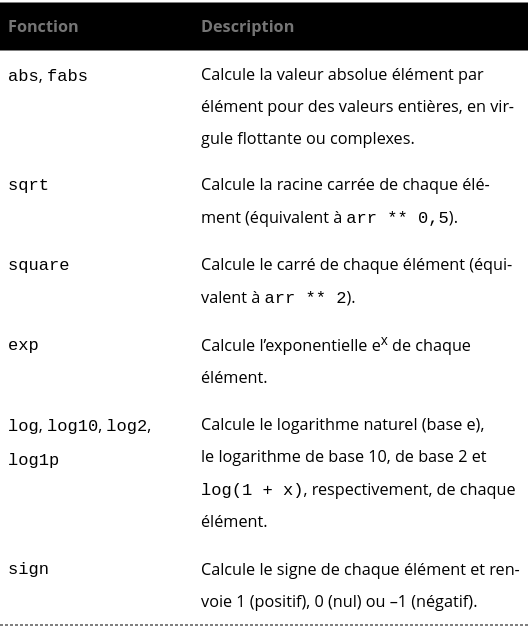  
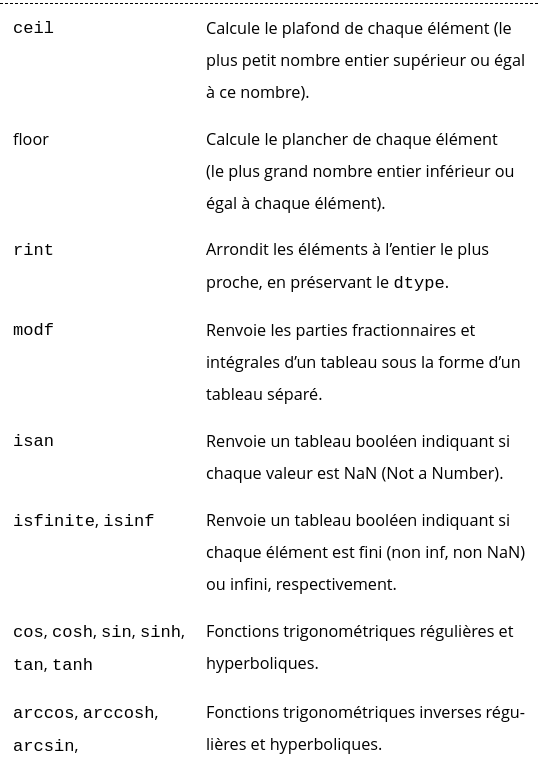

## Exprimer une logique conditionnelle sous forme d’opérations de tableau
La fonction numpy.where est une version vectorisée de l’expression ternaire x if condition else y. Supposons que nous ayons un tableau booléen et deux tableaux de valeurs :

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Supposons que nous voulions prendre une valeur de xarr lorsque la valeur correspondante dans cond est vraie, et sinon prendre la valeur de yarr. Nous pourrions alors avoir la compréhension de liste suivante :

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Cela pose de multiples problèmes. Premièrement, ce code ne sera pas très performant pour de grands tableaux (du fait que tout le travail est effectué avec du code Python interprété). Deuxièmement, il ne fonctionnera pas avec des tableaux multidimensionnels. Avec np.where, vous pouvez écrire cela de manière très concise :

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

Les deuxième et troisième arguments de np.where ne sont pas nécessairement des tableaux : l’un ou les deux peuvent être des scalaires. Une utilisation typique de where dans l’analyse des données consiste à produire un nouveau tableau de valeurs basé sur un autre tableau. Supposons que vous ayez une matrice de données générées de manière aléatoire et que vous vouliez remplacer toutes les valeurs positives par 2 et toutes les valeurs négatives par –2. C’est très facile à réaliser avec np.where :

In [ ]:
arr = np.random.randn(4, 4)
arr

array([[ 0.3616, -0.6451,  0.3614,  1.538 ],
       [-0.0358,  1.5646, -2.6197,  0.8219],
       [ 0.087 , -0.299 ,  0.0918, -1.9876],
       [-0.2197,  0.3571,  1.4779, -0.5183]])

In [ ]:
arr > 0

array([[ True, False,  True,  True],
       [False,  True, False,  True],
       [ True, False,  True, False],
       [False,  True,  True, False]])

In [ ]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2,  2, -2,  2],
       [ 2, -2,  2, -2],
       [-2,  2,  2, -2]])

Vous pouvez combiner des scalaires et des tableaux en utilisant np.where. Par exemple, je peux remplacer toutes les valeurs positives dans arr par la constante 2, comme cela :

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.    , -0.6451,  2.    ,  2.    ],
       [-0.0358,  2.    , -2.6197,  2.    ],
       [ 2.    , -0.299 ,  2.    , -1.9876],
       [-0.2197,  2.    ,  2.    , -0.5183]])

## Méthodes mathématiques et statistiques
Un ensemble de fonctions mathématiques qui calculent des statistiques sur un tableau entier ou sur les données le long d’un axe sont accessibles en tant que méthodes de la classe des tableaux. Vous pouvez utiliser des agrégations (souvent appelées réductions) comme la somme (sum), la moyenne (mean) et l’écart-type (std) soit en appelant la méthode de l’instance de tableau, soit en utilisant la fonction NumPy de haut niveau. Ici, je génère des données aléatoires avec une distribution normale, et je calcule des statistiques globales :

In [ ]:
arr = np.random.randn(5, 4)
arr

array([[-0.8085, -0.5018,  0.9154,  0.3288],
       [-0.5298,  0.5133,  0.0971,  0.9686],
       [-0.7021, -0.3277, -0.3921, -1.4635],
       [ 0.2961,  0.2611,  0.0051, -0.2346],
       [-1.4154, -0.4206, -0.3427, -0.8023]])

In [ ]:
arr.mean()

-0.2277755984840249

In [ ]:
np.mean(arr)

-0.2277755984840249

In [ ]:
arr.sum()

-4.555511969680498

Les fonctions comme mean et sum prennent un argument axis optionnel qui calcule la statistique pour l’axe spécifié, ce qui donne un tableau avec une dimension de moins :

In [ ]:
arr.mean(axis=1)

array([-0.0165,  0.2623, -0.7213,  0.0819, -0.7453])

In [ ]:
arr.sum(axis=0)

array([-3.1596, -0.4757,  0.2828, -1.203 ])

Ici, arr.mean(1) signifie « calculer la moyenne entre les colonnes », et arr.sum(0) signifie « calculer la somme des lignes ».

## Unique et autres logiques d’ensembles :  
NumPy dispose d’opérations ensemblistes de base pour les tableaux unidimensionnels. Une opération couramment utilisée est np.unique, qui renvoie les valeurs uniques triées dans un tableau :

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])